In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import datetime
import time

In [31]:
df = pd.read_csv('data_with_datetime.csv')

In [32]:
# Convert the timestamp column to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

In [33]:
# Convert the timestamp column to a datetime data type and set it as the index of the DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [34]:
df.dtypes

house_id             object
house_size          float64
temperature         float64
humidity            float64
precipitation       float64
wind_speed          float64
solar_irradiance    float64
week_of_the_year      int64
hour_of_the_day       int64
day_of_the_week       int64
wday__0               int64
wday__1               int64
wday__2               int64
wday__3               int64
wday__4               int64
wday__5               int64
wday__6               int64
consumption         float64
dtype: object

In [35]:
print(df["house_id"].value_counts())

house_0     8757
house_13    8757
house_23    8757
house_22    8757
house_21    8757
house_20    8757
house_19    8757
house_18    8757
house_17    8757
house_16    8757
house_15    8757
house_14    8757
house_12    8757
house_1     8757
house_11    8757
house_10    8757
house_9     8757
house_8     8757
house_7     8757
house_6     8757
house_5     8757
house_4     8757
house_3     8757
house_2     8757
house_24    8757
Name: house_id, dtype: int64


In [36]:
# Define a dictionary to map the object values to integer values
mapping = {'house_0': 0, 'house_1': 1, 'house_2': 2, 'house_3': 3, 'house_4': 4, 'house_5': 5, 'house_56': 6, 'house_7': 7,'house_8': 8, 'house_9': 9, 'house_10': 10, 'house_11': 11, 'house_12': 12, 'house_13': 13, 'house_14': 14, 'house_15': 15, 'house_16': 16, 'house_17': 17, 'house_18': 18, 'house_19': 19, 'house_20': 20, 'house_21': 21, 'house_22': 22, 'house_23': 23, 'house_24': 24}

# Use the map() method to apply the mapping to the column values
df['house_id'] = df['house_id'].map(mapping)

In [37]:
df.dtypes

house_id            float64
house_size          float64
temperature         float64
humidity            float64
precipitation       float64
wind_speed          float64
solar_irradiance    float64
week_of_the_year      int64
hour_of_the_day       int64
day_of_the_week       int64
wday__0               int64
wday__1               int64
wday__2               int64
wday__3               int64
wday__4               int64
wday__5               int64
wday__6               int64
consumption         float64
dtype: object

In [38]:
# Explore the data
print(df.head())
print(df.describe())

                           house_id  house_size  temperature  humidity  \
timestamp                                                                
2014-12-01 00:00:00+00:00       0.0        38.4    12.856301  0.227995   
2014-12-01 01:00:00+00:00       0.0        38.4    12.126253  0.220464   
2014-12-01 02:00:00+00:00       0.0        38.4    15.277380  0.361294   
2014-12-01 03:00:00+00:00       0.0        38.4    12.817692  0.236057   
2014-12-01 04:00:00+00:00       0.0        38.4    14.343213  0.051376   

                           precipitation  wind_speed  solar_irradiance  \
timestamp                                                                
2014-12-01 00:00:00+00:00       1.272970    4.708708        195.588130   
2014-12-01 01:00:00+00:00       2.814100    3.156671        203.112272   
2014-12-01 02:00:00+00:00       0.515568    3.490243        204.453061   
2014-12-01 03:00:00+00:00       1.920968    3.191047        192.645952   
2014-12-01 04:00:00+00:00       2.292

In [39]:
# Check for missing values
print(df.isnull().sum())

house_id            8757
house_size             0
temperature            0
humidity               0
precipitation          0
wind_speed             0
solar_irradiance       0
week_of_the_year       0
hour_of_the_day        0
day_of_the_week        0
wday__0                0
wday__1                0
wday__2                0
wday__3                0
wday__4                0
wday__5                0
wday__6                0
consumption            0
dtype: int64


In [40]:
# Fill missing values with the mean of the column
mean = df['house_id'].mean()
df = df.fillna(mean)

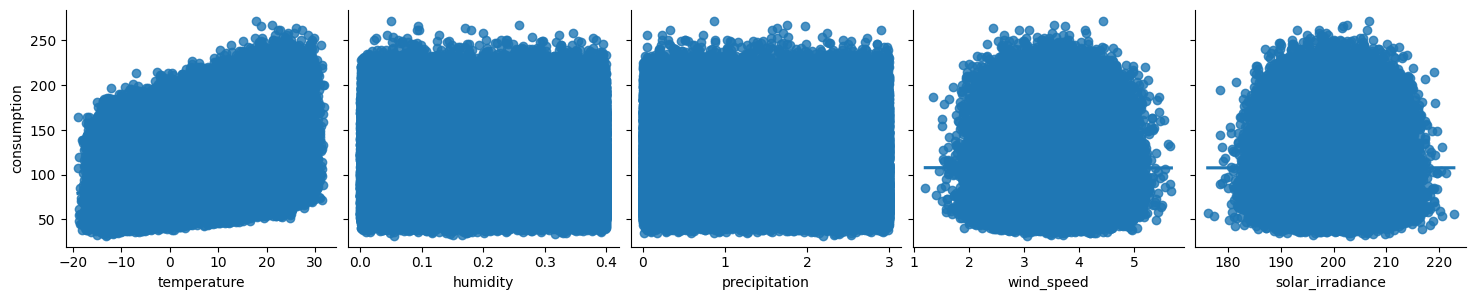

In [41]:
# Visualize the data using Seaborn library
sns.pairplot(df, x_vars=['temperature', 'humidity', 'precipitation', 'wind_speed', 'solar_irradiance'], y_vars='consumption', height=3, aspect=1, kind='reg')
plt.show()

In [54]:
corelation=df.corr()

<Axes: >

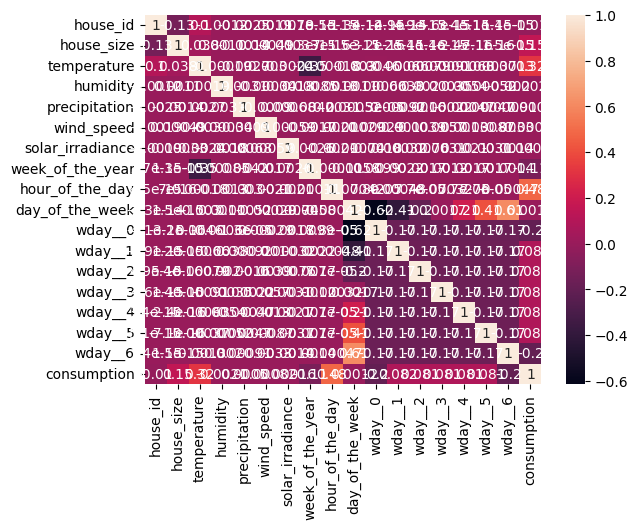

In [55]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
            annot=True)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('consumption', axis=1), df['consumption'], test_size=0.2, random_state=42)

In [43]:
# Define categorical columns for one-hot encoding
cat_cols = ['wday__0','wday__1','wday__2','wday__3','wday__4','wday__5','wday__6']

In [44]:
# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), cat_cols)], remainder='passthrough')

In [45]:
# Fit the column transformer to the training data and transform both the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [46]:
# Create a decision tree model
model = DecisionTreeRegressor()

In [47]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print('Mean squared error:', mse)
print('R^2 score:', r2)

Mean squared error: 213.69326090877087
R^2 score: 0.865836916955291


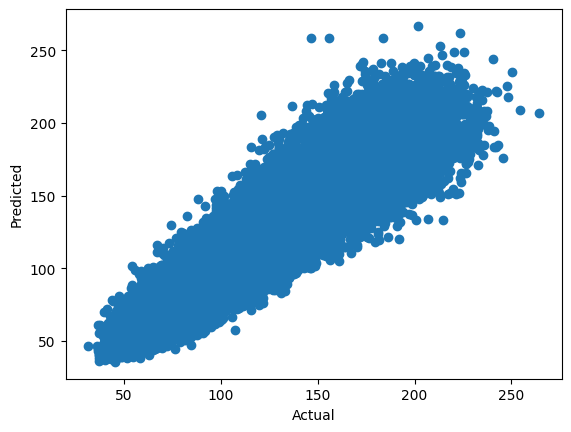

In [51]:
# Visualize the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [58]:
from collections import OrderedDict
import seaborn as sns

colors = ["#845EC2", "#D65DB1", "#FF6F91", "#FF9671", 
             "#FFC75F", "#008F7A", "#F9F871"]
# background_color = "#FFF6FF"
background_color = "white"

In [59]:
def show_category_distribution(data_frame,
                            label_name,
                            colors,
                            exclude=[],
                            figsize=(10, 5),
                            d=[1, 2],
                            bg_color=background_color):

    label_dict = data_frame[label_name].value_counts().to_dict()
    for e in exclude:
        del label_dict[e]
    label_dict = OrderedDict(sorted(label_dict.items(), key=lambda label: label[1]))
    label_classes= label_dict.keys()
    label_values = label_dict.values()
    explode = (0,)*(data_frame[label_name].nunique() - len(exclude))

    fig, ax = plt.subplots(d[0], d[1], facecolor=bg_color, figsize=figsize)
    sns.countplot(data=data_frame,
                  x=label_name,
                  palette=colors,
                  edgecolor="black",
                  hatch="\\",
                  ax=ax[0],
                  linewidth=1,
                  order = data_frame[label_name].value_counts().index)
    ax[0].set_title(f"Distribution of \"{label_name}\"", size=14, fontweight="bold")
    ax[0].set_xlabel("Class", size=10, fontweight="bold")
    ax[0].set_ylabel("Frequency", size=10, fontweight="bold")
    ax[0].tick_params(axis="x", labelsize=9) 
    ax[0].tick_params(axis="y", labelsize=9)
    ax[0].bar_label(ax[0].containers[0], fmt="%.0f", color="black", fontsize=9)

    plt.pie(label_values,
            explode=explode,
            labels=label_classes,
            autopct="%1.2f%%",
            shadow=True,
            startangle=90,
            textprops={"fontsize": 8, "fontweight": "bold", "color": "black"},
            wedgeprops={"edgecolor": "black"},
            colors=colors,
            labeldistance=1.1)
    plt.title(f"Distribution \n of \"{label_name}\". {','.join(exclude)} {'Excluded' if len(exclude)>0 else ''}",
              fontweight="bold",
              fontsize=14)

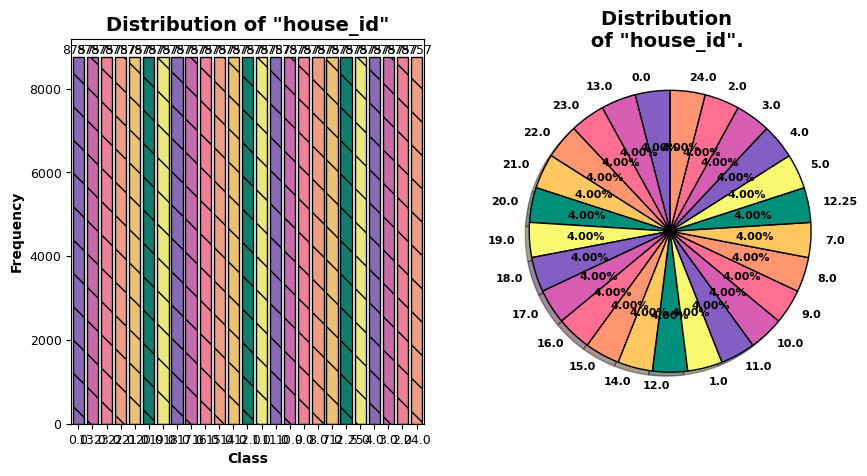

In [60]:
show_category_distribution(df,
                        "house_id",
                        colors,
                        bg_color=background_color)

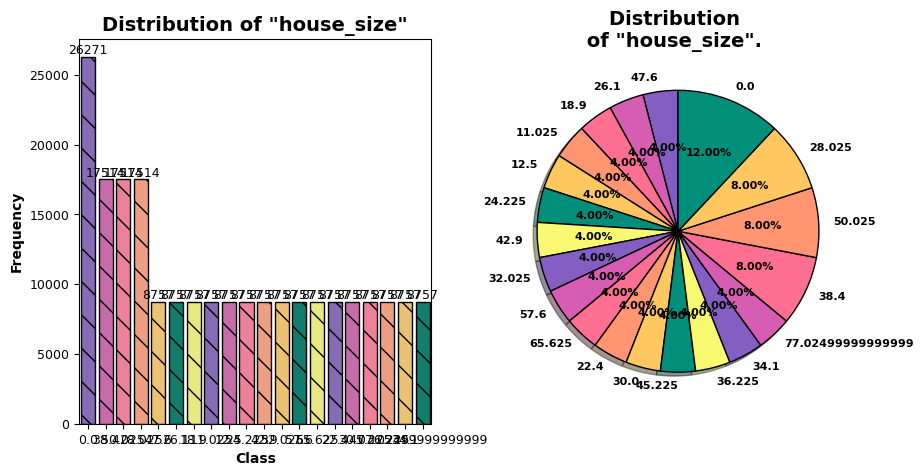

In [61]:
show_category_distribution(df,
                        "house_size",
                        colors,
                        bg_color=background_color)

In [64]:
def show_numerical_distributions(data_frame, features, label, colors, kind="kde",  fill=True, combined=True):
    if combined:
        for feature in features:
            with sns.axes_style("white",
                           rc={"axes.facecolor": background_color, "figure.facecolor": background_color}):
                sns.displot(data=data_frame,
                            x=feature,
                            hue=label,
                            kind=kind,
                            palette=colors,
                            fill=fill,
                            legend=True,
                            aspect=2.5)
                plt.title("Distribution of " + feature.capitalize() + " by " + label.capitalize(),
                          size=14,
                          fontweight="bold",
                          color="black")
    else:
        for feature in features : 
            with sns.axes_style("white",
                                rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor': background_color}):

                g = sns.FacetGrid(df,
                                  row=label,
                                  hue=label,
                                  aspect=20,
                                  height=.5,
                                  palette=colors)

                g.map(sns.kdeplot,
                      feature,
                      bw_adjust=.5,
                      clip_on=False,
                      fill=True,
                      alpha=1,
                      linewidth=1.5)

                g.map(sns.kdeplot,
                      feature,
                      clip_on=False,
                      color="w",
                      lw=2,
                      bw_adjust=.5)

                g.map(plt.axhline,
                      y=0,
                      linewidth=2,
                      linestyle="-",
                      color=None,
                      clip_on=False)

                def plot_label(x, color, label):
                    ax = plt.gca()
                    ax.text(0,
                            .2,
                            label,
                            fontweight="bold",
                            color=color,
                            ha="left",
                            va="center",
                            transform=ax.transAxes)

                g.map(plot_label, label)
                g.fig.subplots_adjust(hspace=-.25)
                g.set_titles("")
                g.set(yticks=[], xlabel="", ylabel="")
                plt.xlabel(feature, fontweight="bold")
                g.despine(bottom=True, left=True)
                plt.title("Distribution of " + feature.capitalize() + " by " + label.capitalize(),
                          size=12,
                          fontweight="bold",
                          color="black",
                          y=6)

In [67]:
numerical_features = ["temperature",
                      "humidity",
                      "precipitation",
                      "wind_speed",
                      "solar_irradiance"]

C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2400870383.py:6: UserWarning: 
The palette list has fewer values (5) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=data_frame,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2400870383.py:6: UserWarning: 
The palette list has fewer values (5) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=data_frame,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2400870383.py:6: UserWarning: 
The palette list has fewer values (5) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=data_frame,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2400870383.py:6: UserWarning: 
The palette list has fewer values (5) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=data_frame,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2400870383.py:6: UserWarning: 
The palette list has fewe

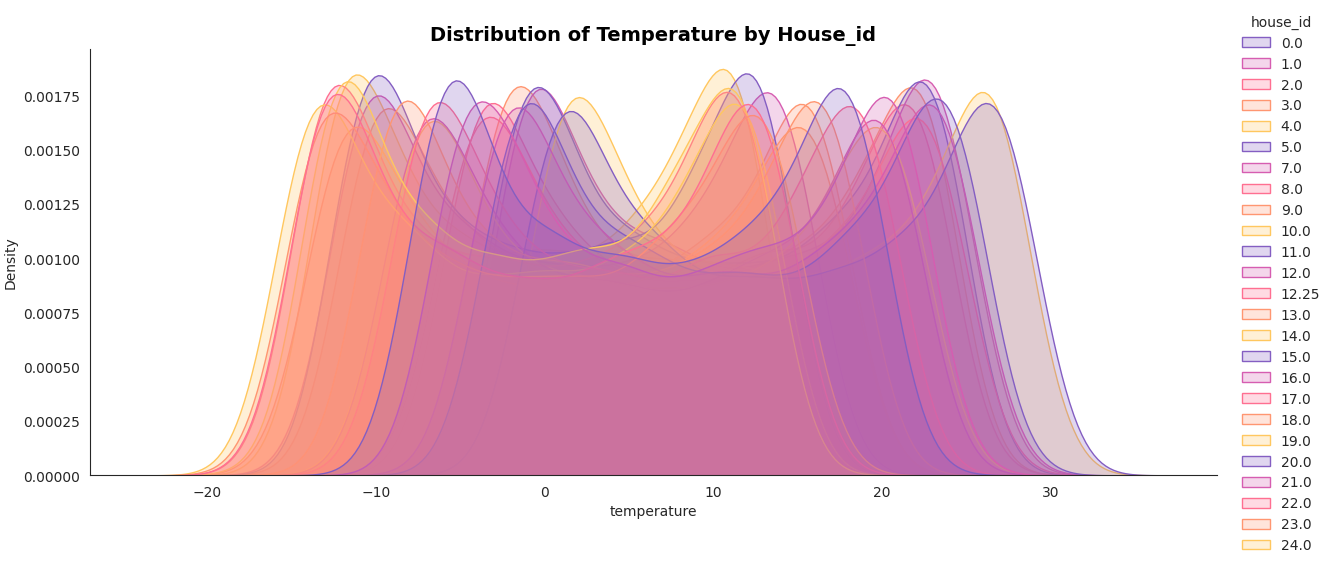

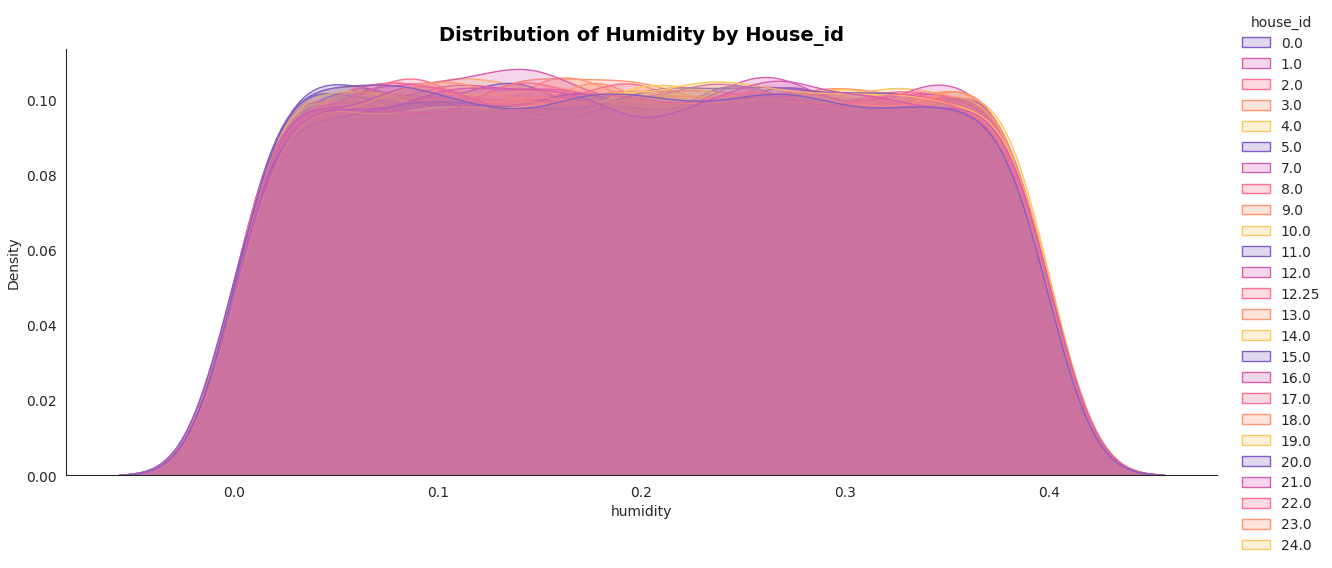

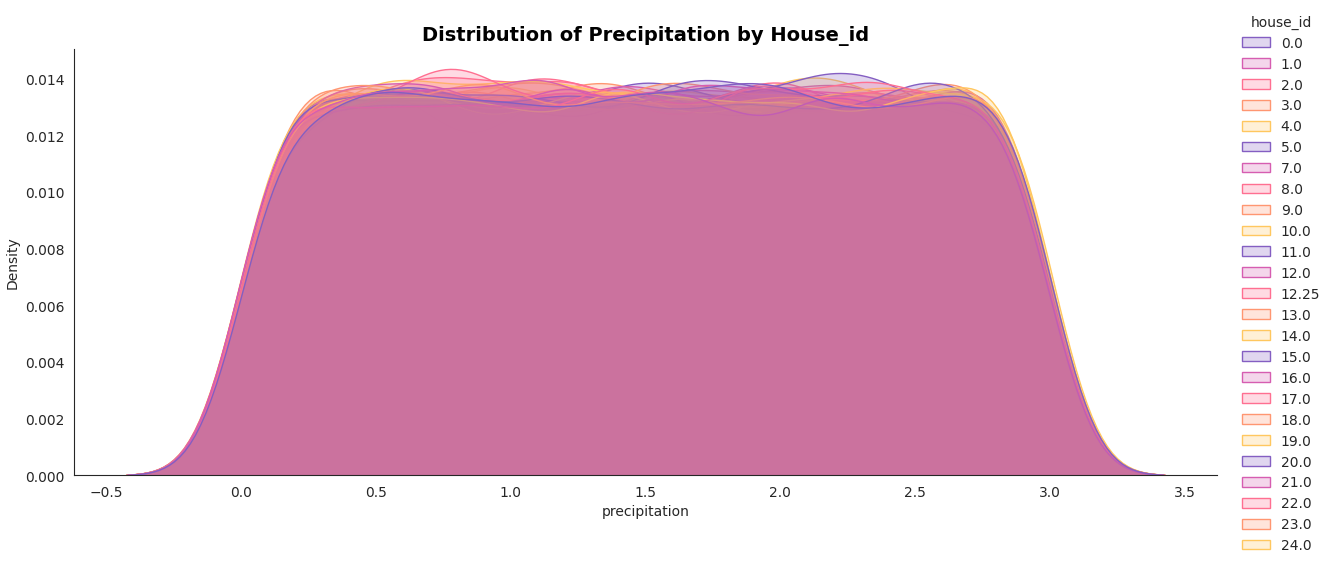

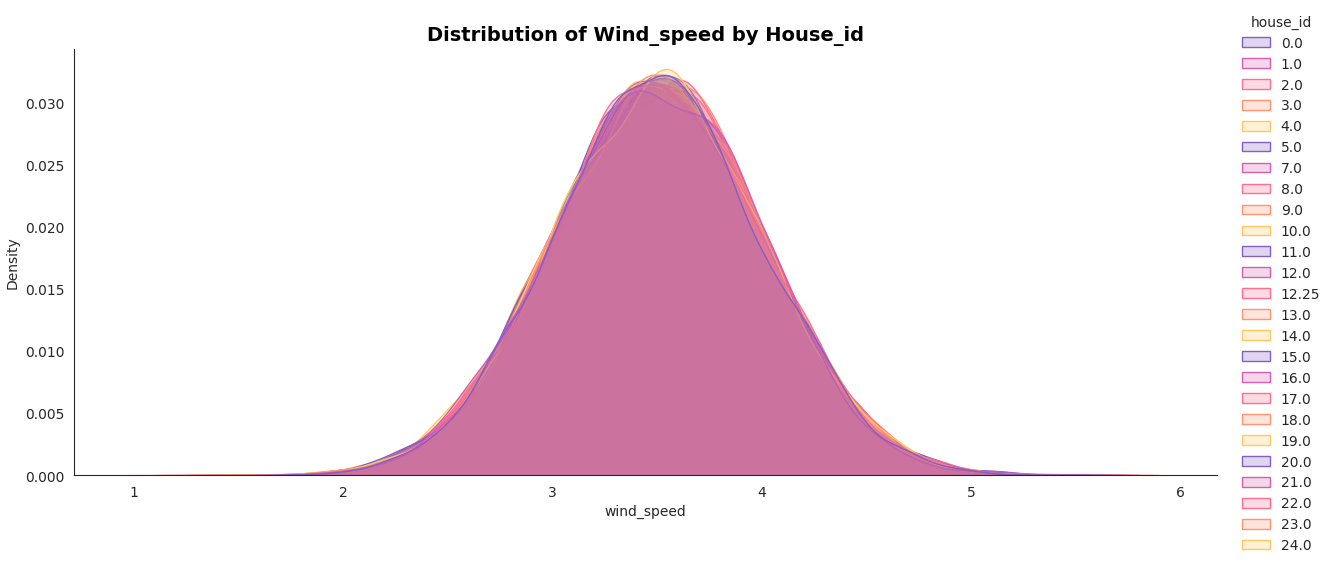

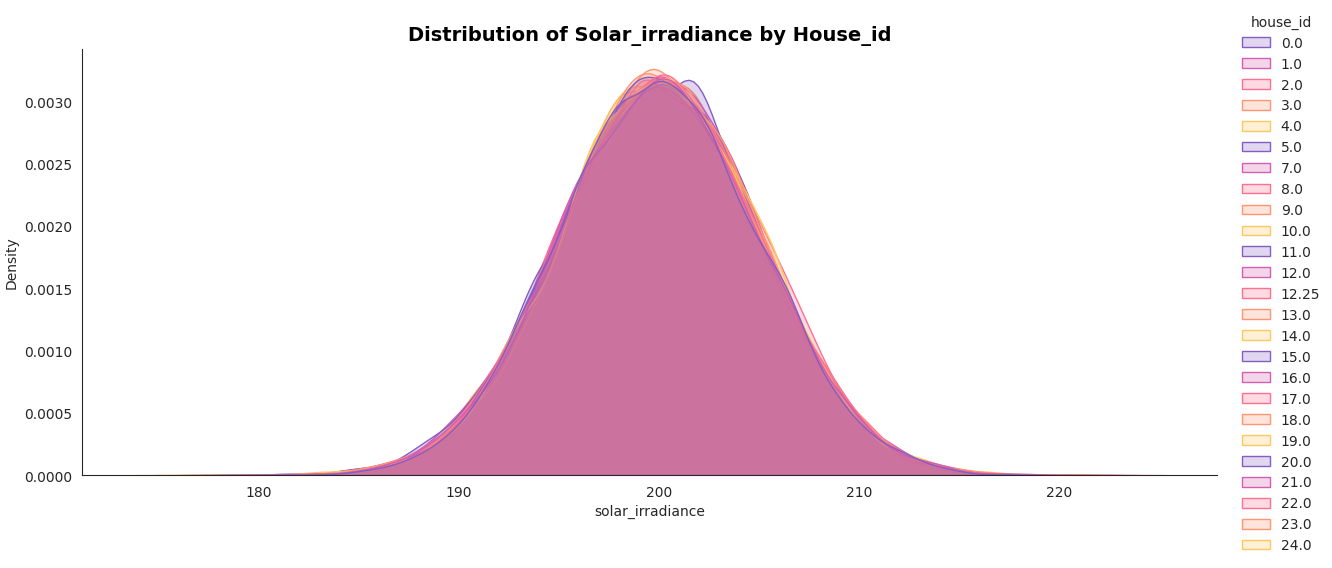

In [70]:
show_numerical_distributions(df[df["house_id"] != "house_0"],
                             numerical_features,
                             "house_id",
                             colors[:5])

In [71]:
def plot_scatter(data, x, y, hue, ax, alpha=0.1, palette=colors[::-1]):
    sns.scatterplot(data=data,
                x=x,
                y=y,
                hue=hue,
                alpha=alpha,
                ax=ax,
                palette=palette);

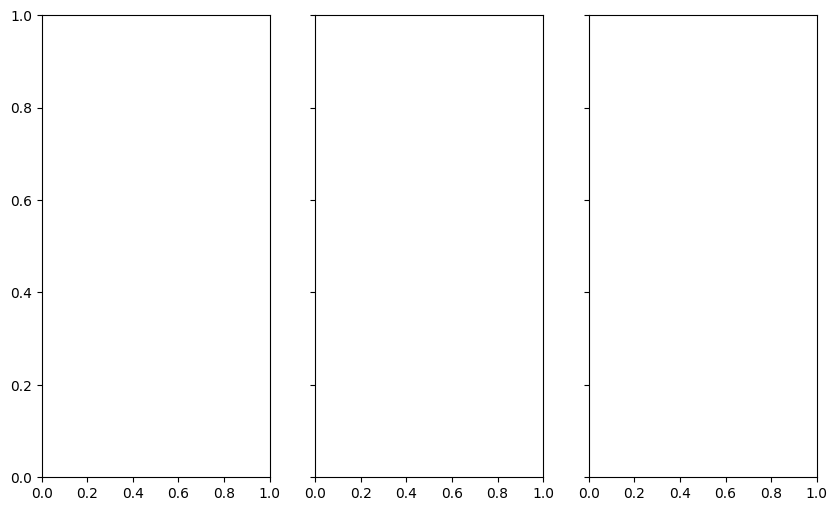

In [72]:
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(10, 6),
                         sharey=True,
                         facecolor=background_color)

C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: 
The palette list has fewer values (7) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: 
The palette list has fewer values (7) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Figo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of

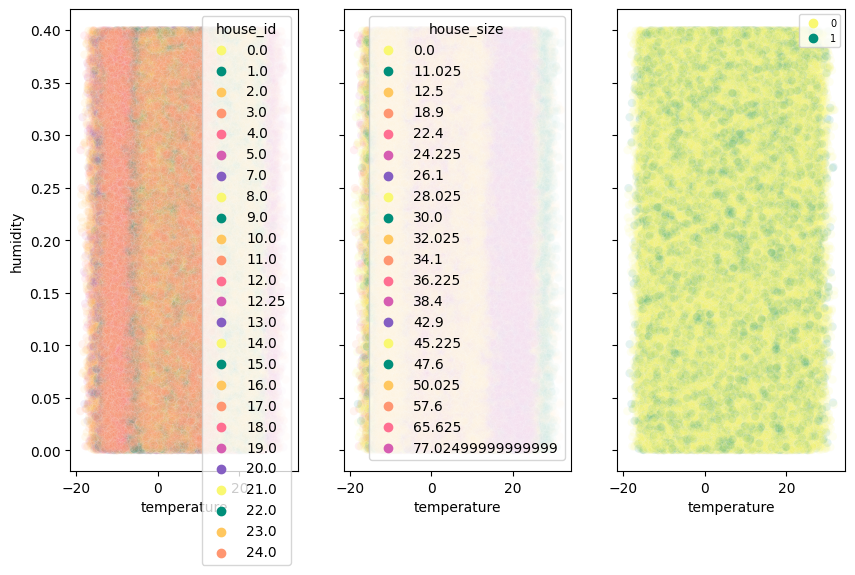

In [73]:
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(10, 6),
                         sharey=True,
                         facecolor=background_color)

plot_scatter(df,
             "temperature",
             "humidity",
             "house_id",
             axes[0])

plot_scatter(df,
             "temperature",
             "humidity",
             "house_size",
             axes[1])

plot_scatter(df,
             "temperature",
             "humidity",
             "wday__0",
             axes[2])

plt.legend(fontsize="7");

C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: 
The palette list has fewer values (7) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: 
The palette list has fewer values (7) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Local\Temp\ipykernel_6908\2095536440.py:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.scatterplot(data=data,
C:\Users\Figo\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Figo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of

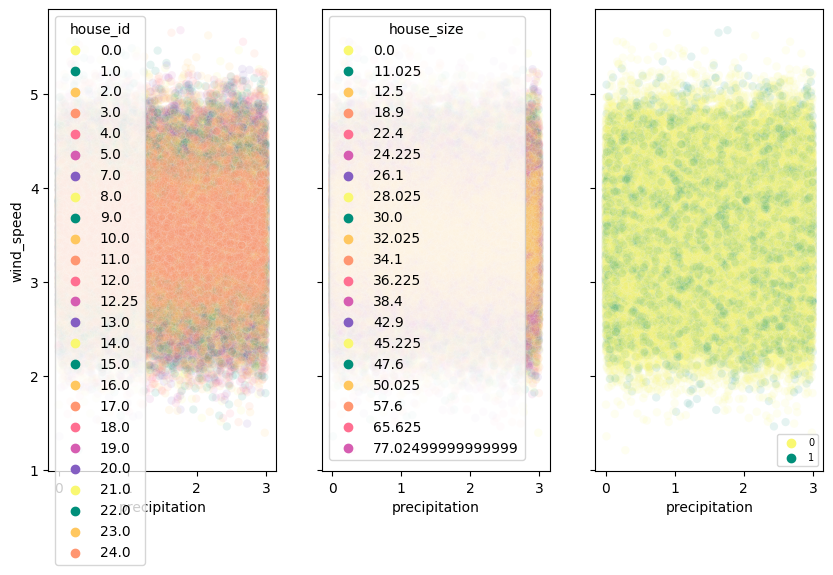

In [74]:
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(10, 6),
                         sharey=True,
                         facecolor=background_color)

plot_scatter(df,
             "precipitation",
             "wind_speed",
             "house_id",
             axes[0])

plot_scatter(df,
             "precipitation",
             "wind_speed",
             "house_size",
             axes[1])

plot_scatter(df,
             "precipitation",
             "wind_speed",
             "wday__0",
             axes[2])

plt.legend(fontsize="7");

In [75]:
def show_outliers(data_frame, exclude=[]):
    columns_list = list(data_frame.columns)
    
    if len(exclude) > 0:
        for e in exclude:
            columns_list.remove(e)

    fig = plt.figure(figsize=(10,30), facecolor=background_color)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for index, column in enumerate(columns_list):
        ax = fig.add_subplot(12, 3, index +1)
        ax = sns.boxplot(x=df[column],
                         notch=True,
                         flierprops={"marker": "x"},
                         boxprops={"facecolor": (.4, .6, .8, .5)},
                         medianprops={"color": "#C34A36"})

In [76]:
df.columns

Index(['house_id', 'house_size', 'temperature', 'humidity', 'precipitation',
       'wind_speed', 'solar_irradiance', 'week_of_the_year', 'hour_of_the_day',
       'day_of_the_week', 'wday__0', 'wday__1', 'wday__2', 'wday__3',
       'wday__4', 'wday__5', 'wday__6', 'consumption'],
      dtype='object')

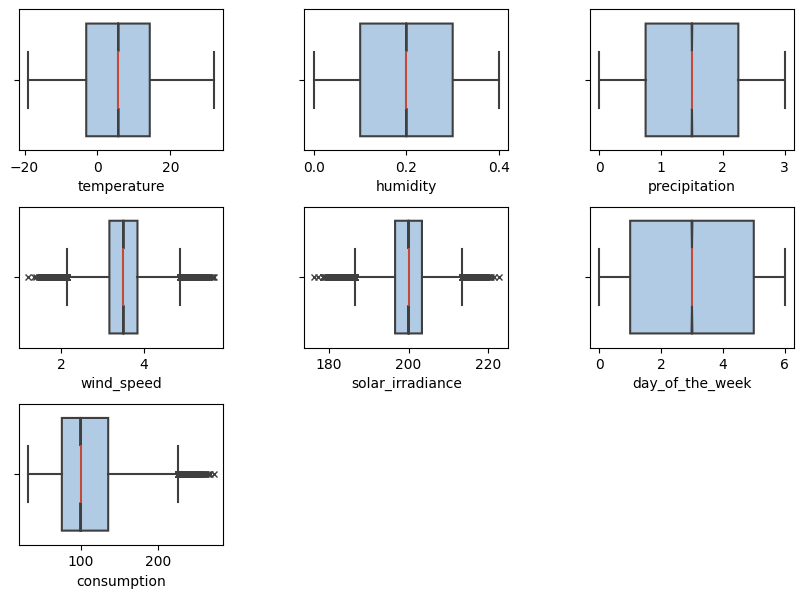

In [81]:
show_outliers(df, exclude=["house_id", "house_size", "week_of_the_year", "hour_of_the_day",'wday__0','wday__1','wday__2','wday__3','wday__4','wday__5','wday__6'])

In [82]:
def show_correlation(data_frame):
    plt.figure(figsize=(10,10), facecolor=background_color)
    corr = data_frame.corr(numeric_only=False)
    sns.heatmap(corr, annot=True, cmap=colors[0:5][::-1])
    plt.title("Correlations", size=22, fontweight="bold")
    plt.tight_layout()

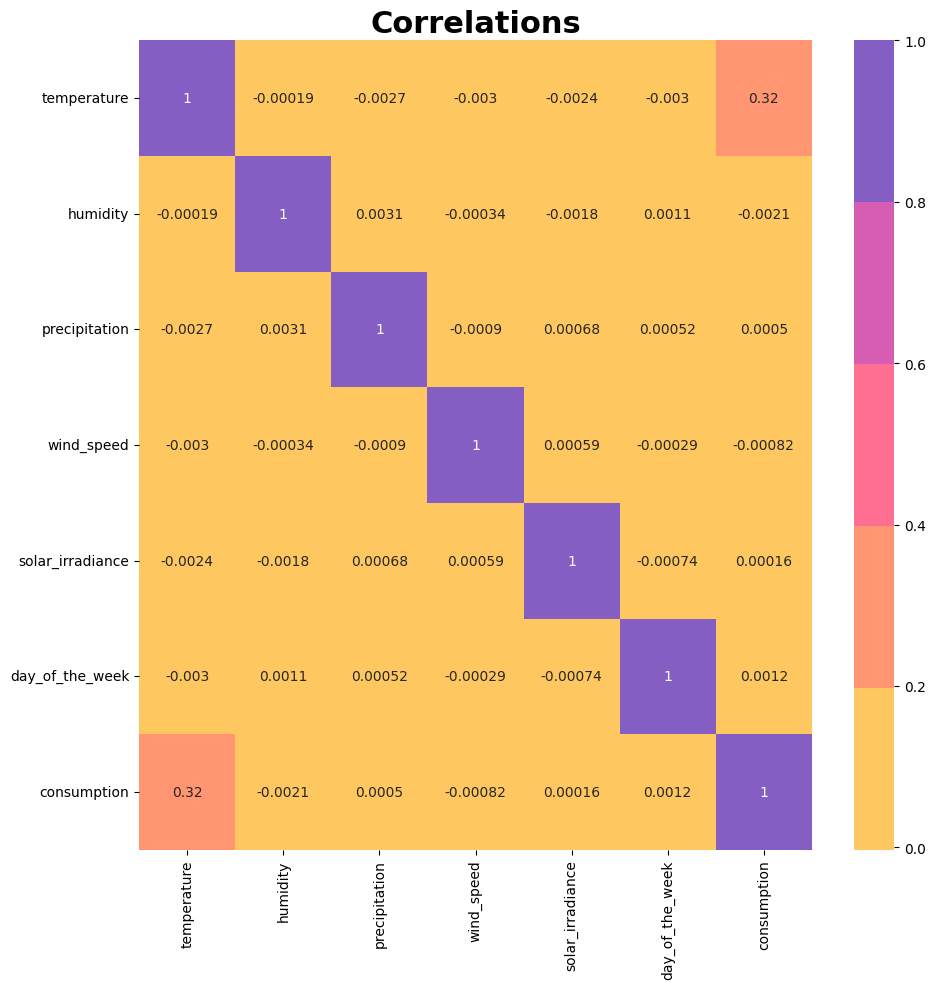

In [84]:
show_correlation(df.drop(["house_id", "house_size", "week_of_the_year", "hour_of_the_day",'wday__0','wday__1','wday__2','wday__3','wday__4','wday__5','wday__6'], axis=1))

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [86]:
random_state = 7
verbose = 0

In [87]:
def confusion_matrix_display(estimator,
                             predicted_y,
                             true_y=encoded_y_test,
                             X=encoded_X_test,
                             y=encoded_y_test,
                             model_name=""):

    fig, ax = plt.subplots(figsize=(6, 6), facecolor=background_color)
    cm = confusion_matrix(predicted_y, true_y)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.from_estimator(estimator, X, y, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")

NameError: name 'encoded_y_test' is not defined

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_state, verbose=verbose)
rfc.fit(encoded_X_train, encoded_y_train);

NameError: name 'encoded_X_train' is not defined

In [89]:
rfc.score(encoded_X_train, encoded_y_train)

NameError: name 'encoded_X_train' is not defined

In [90]:
rfc.score(encoded_X_test, encoded_y_test)

NameError: name 'encoded_X_test' is not defined

In [91]:
rfc_predicted_y = rfc.predict(encoded_X_test)

NameError: name 'encoded_X_test' is not defined

In [92]:
rfc_cr = classification_report(encoded_y_test, rfc_predicted_y, output_dict=True)
classification_report_heatmap(rfc_cr, model_name="Random Forest")

NameError: name 'encoded_y_test' is not defined

In [93]:
confusion_matrix_display(rfc, rfc_predicted_y, model_name="Random Forest")

NameError: name 'confusion_matrix_display' is not defined